<a href="https://colab.research.google.com/github/lukiod/dl-college/blob/main/lab4.2_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
from keras import datasets, layers, models, Model
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

In [15]:
def prepare_cifar10_data():
    print("\n" + "="*50)
    print("PART 1: DATA PREPARATION")
    print("="*50)

    print("Loading and preparing CIFAR-10 dataset...")

    # Load the CIFAR-10 dataset
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

    # Normalize the data
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Flatten the label arrays
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Define class names
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

    print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
    print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

    # Save the prepared data to files
    with open('cifar10_data.pkl', 'wb') as f:
        pickle.dump({
            'X_train': X_train,
            'y_train': y_train,
            'X_test': X_test,
            'y_test': y_test,
            'class_names': class_names
        }, f)

    print("Data preparation complete.")

    return X_train, y_train, X_test, y_test, class_names

# Execute the data preparation
X_train, y_train, X_test, y_test, class_names = prepare_cifar10_data()


PART 1: DATA PREPARATION
Loading and preparing CIFAR-10 dataset...
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000,)
Data preparation complete.



PART 2: CNN MODEL WITH MLP CLASSIFIER
Building and training CNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                     │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_2 (Conv2D)                     │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_1 (Conv2D)                     │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2_2 (Conv2D)                     │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3_1 (Conv2D)                     │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3_2 (Conv2D)                     │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ final_pool (MaxPooling2D)            │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.2485 - loss: 2.1726 - val_accuracy: 0.1616 - val_loss: 2.8885
Epoch 2/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4462 - loss: 1.5119 - val_accuracy: 0.5576 - val_loss: 1.2404
Epoch 3/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5508 - loss: 1.2548 - val_accuracy: 0.6342 - val_loss: 1.0446
Epoch 4/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6065 - loss: 1.1179 - val_accuracy: 0.6398 - val_loss: 1.0430
Epoch 5/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6564 - loss: 0.9883 - val_accuracy: 0.7120 - val_loss: 0.8395
Epoch 6/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6920 - loss: 0.8930 - val_accuracy: 0.7392 - val_loss: 0.7657
Epoch 7/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7177 - loss: 0.8328 - val_accuracy: 0.7364 - val_loss: 0.7792
Epoch 8/15
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7363 - loss: 0.7693 - val

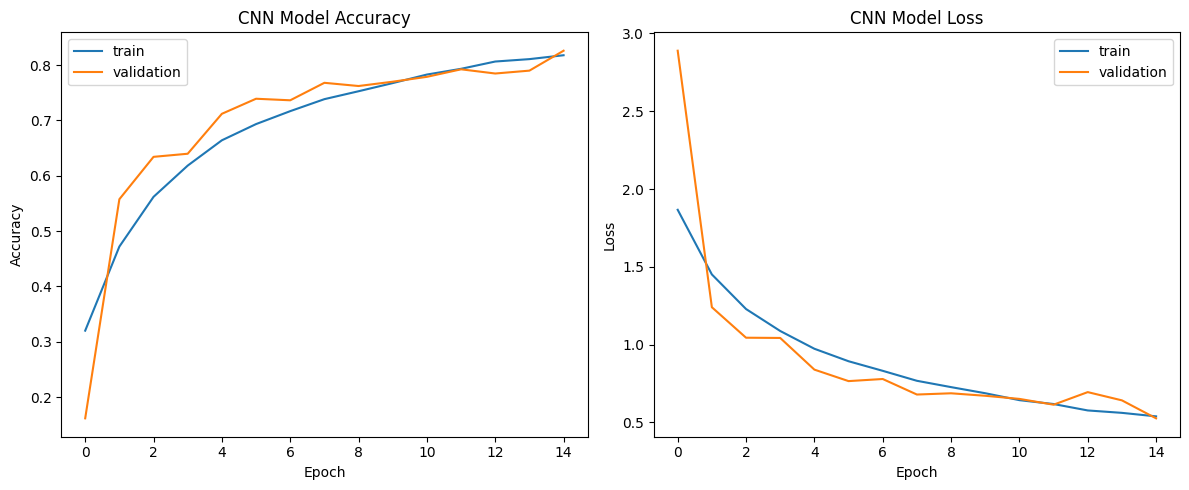

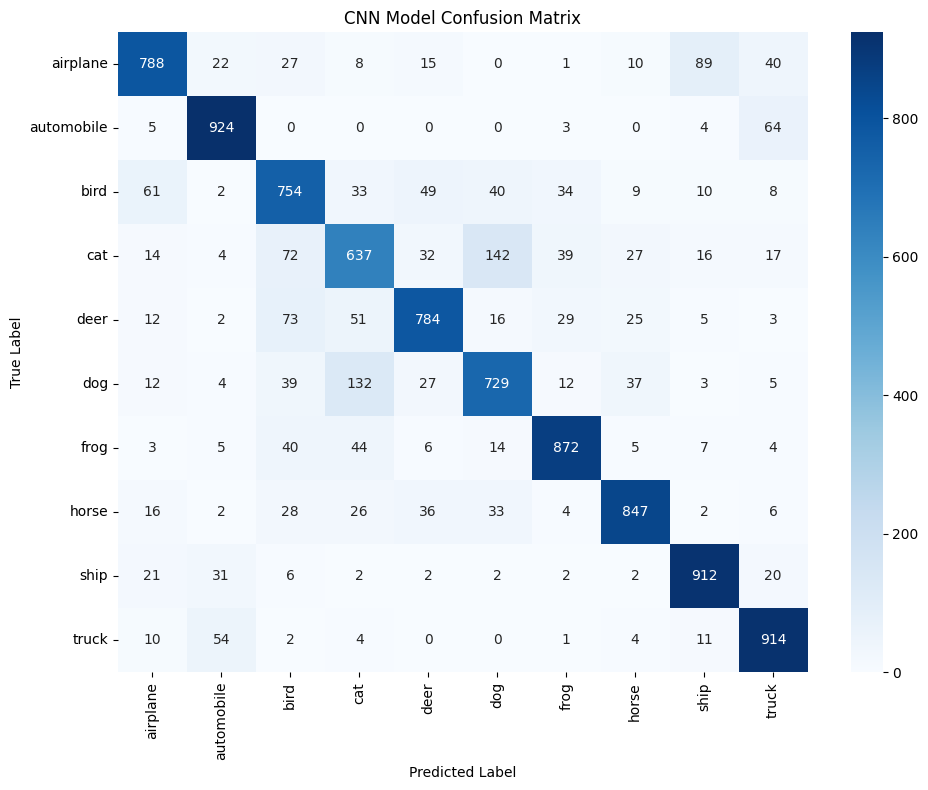


CNN Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.79      0.81      1000
  automobile       0.88      0.92      0.90      1000
        bird       0.72      0.75      0.74      1000
         cat       0.68      0.64      0.66      1000
        deer       0.82      0.78      0.80      1000
         dog       0.75      0.73      0.74      1000
        frog       0.87      0.87      0.87      1000
       horse       0.88      0.85      0.86      1000
        ship       0.86      0.91      0.89      1000
       truck       0.85      0.91      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [16]:
def build_and_train_cnn(X_train, y_train, X_test, y_test, class_names):
    print("\n" + "="*50)
    print("PART 2: CNN MODEL WITH MLP CLASSIFIER")
    print("="*50)

    print("Building and training CNN model...")
    start_time = time.time()

    # Build CNN model with the specified architecture
    model = models.Sequential([
        # Input layer
        layers.InputLayer(input_shape=(32, 32, 3)),

        # First block: 2x Conv2D with BatchNorm
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_1'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        # Second block: 2x Conv2D with BatchNorm
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_1'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),

        # Third block: 2x Conv2D with BatchNorm
        layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_1'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3_2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), name='final_pool'),
        layers.Dropout(0.3),

        # Flatten and Dense (MLP classifier)
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Display model summary
    model.summary()

    # Early stopping callback to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=128,
        epochs=15,
        validation_split=0.1,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model
    print("Evaluating CNN model...")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

    # Get predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Calculate training time
    training_time = time.time() - start_time

    print(f"CNN Test Accuracy: {test_acc:.4f}")
    print(f"CNN Training Time: {training_time:.2f} seconds")

    # Save the model
    model.save('cnn_model.keras')

    # Save results
    with open('cnn_results.pkl', 'wb') as f:
        pickle.dump({
            'history': history.history,
            'y_pred': y_pred,
            'accuracy': test_acc,
            'training_time': training_time
        }, f)

    # Plot training history
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.title('CNN Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('CNN Model Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nCNN Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    return model, history, y_pred, test_acc, training_time

# Execute the CNN model building and training
cnn_model, cnn_history, cnn_y_pred, cnn_accuracy, cnn_training_time = build_and_train_cnn(
    X_train, y_train, X_test, y_test, class_names
)

In [17]:
def extract_cnn_features(model, X_train, y_train, X_test, y_test, class_names):
    print("\n" + "="*50)
    print("PART 3: FEATURE EXTRACTION")
    print("="*50)

    print("Creating feature extractor from trained CNN...")

    # Create a feature extractor model that outputs activations from the final pooling layer
    # Find the index of the final pooling layer
    layer_names = [layer.name for layer in model.layers]
    final_pool_idx = layer_names.index('final_pool')

    # Create the feature extractor model
    feature_extractor = Model(
        inputs=model.layers[0].input,
        outputs=model.layers[final_pool_idx].output
    )

    # Extract features
    print("Extracting features...")
    start_time = time.time()

    # Get features
    X_train_features = feature_extractor.predict(X_train, batch_size=128, verbose=1)
    X_test_features = feature_extractor.predict(X_test, batch_size=128, verbose=1)

    # Flatten the features for use with traditional ML classifiers
    X_train_features_flat = X_train_features.reshape(X_train_features.shape[0], -1)
    X_test_features_flat = X_test_features.reshape(X_test_features.shape[0], -1)

    print(f"Feature shapes: Train: {X_train_features_flat.shape}, Test: {X_test_features_flat.shape}")
    print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds")

    # Save the features
    with open('extracted_features.pkl', 'wb') as f:
        pickle.dump({
            'X_train_features': X_train_features_flat,
            'y_train': y_train,
            'X_test_features': X_test_features_flat,
            'y_test': y_test,
            'class_names': class_names
        }, f)

    print("Features saved to 'extracted_features.pkl'")

    # Save the feature extractor model
    feature_extractor.save('feature_extractor.keras')

    return X_train_features_flat, X_test_features_flat

# Execute the feature extraction
X_train_features, X_test_features = extract_cnn_features(
    cnn_model, X_train, y_train, X_test, y_test, class_names
)


PART 3: FEATURE EXTRACTION
Creating feature extractor from trained CNN...
Extracting features...
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Feature shapes: Train: (50000, 2048), Test: (10000, 2048)
Feature extraction completed in 8.29 seconds
Features saved to 'extracted_features.pkl'



PART 4A: SVM CLASSIFIER
Training SVM classifier...
Scaling features...
Applying PCA to reduce dimensions...
Reduced feature dimensions: (50000, 100)
Variance explained: 57.16%
Training LinearSVC classifier...
Fitting LinearSVC model...
[LibLinear]LinearSVC Test Accuracy: 0.8163
LinearSVC Training Time: 13.41 seconds


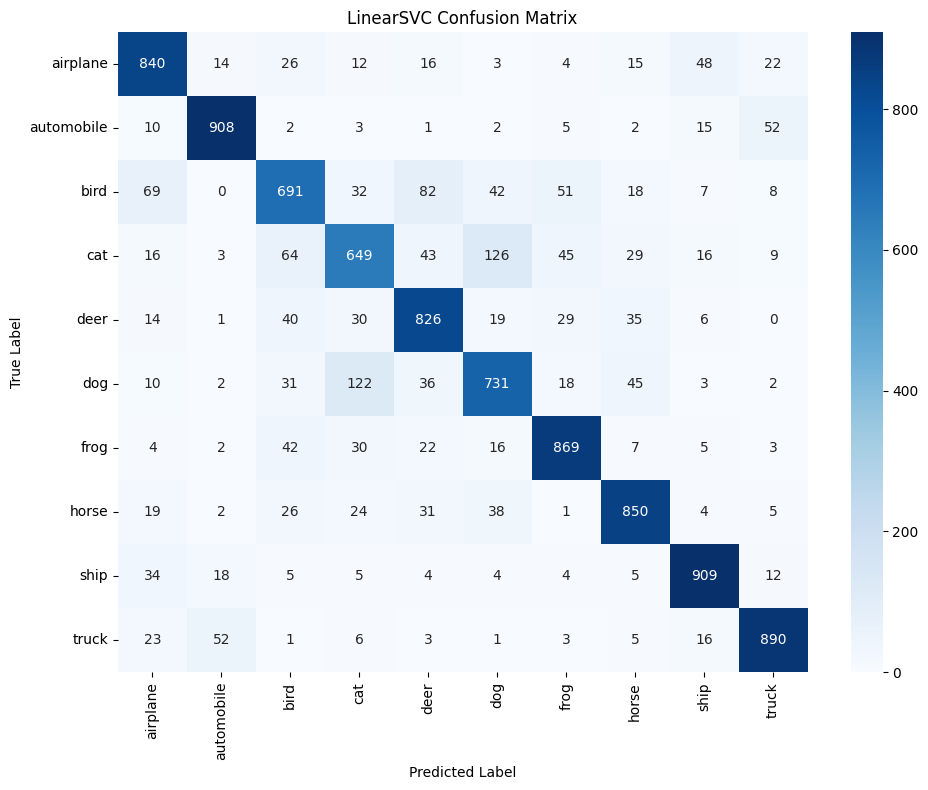


LinearSVC Classification Report:
              precision    recall  f1-score   support

    airplane       0.81      0.84      0.82      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.74      0.69      0.72      1000
         cat       0.71      0.65      0.68      1000
        deer       0.78      0.83      0.80      1000
         dog       0.74      0.73      0.74      1000
        frog       0.84      0.87      0.86      1000
       horse       0.84      0.85      0.85      1000
        ship       0.88      0.91      0.90      1000
       truck       0.89      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.82     10000
weighted avg       0.81      0.82      0.82     10000



In [18]:
def train_svm_classifier(X_train_features, y_train, X_test_features, y_test, class_names):
    print("\n" + "="*50)
    print("PART 4A: SVM CLASSIFIER")
    print("="*50)

    print("Training SVM classifier...")

    # Scale features (important for SVM)
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_features)
    X_test_scaled = scaler.transform(X_test_features)

    # Apply PCA for dimensionality reduction (major speedup)
    print("Applying PCA to reduce dimensions...")
    n_components = 100  # Retain top 100 principal components
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Reduced feature dimensions: {X_train_pca.shape}")
    print(f"Variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

    # Train SVM using LinearSVC (much faster than SVC)
    print("Training LinearSVC classifier...")
    start_time = time.time()

    # LinearSVC is much faster than regular SVC with 'linear' kernel
    # Setting dual=False is faster when n_samples > n_features
    svm_clf = LinearSVC(
        C=1.0,
        max_iter=1000,
        dual=False,
        random_state=42,
        verbose=1
    )

    print("Fitting LinearSVC model...")
    svm_clf.fit(X_train_pca, y_train)

    # Evaluate the model
    y_pred = svm_clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time

    print(f"LinearSVC Test Accuracy: {accuracy:.4f}")
    print(f"LinearSVC Training Time: {training_time:.2f} seconds")

    # Save results
    with open('svm_results.pkl', 'wb') as f:
        pickle.dump({
            'y_pred': y_pred,
            'accuracy': accuracy,
            'training_time': training_time,
            'pca_components': n_components,
            'variance_explained': sum(pca.explained_variance_ratio_)*100
        }, f)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('LinearSVC Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nLinearSVC Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    return svm_clf, y_pred, accuracy, training_time

# Execute the SVM classifier
svm_clf, svm_y_pred, svm_accuracy, svm_training_time = train_svm_classifier(
    X_train_features, y_train, X_test_features, y_test, class_names
)


PART 4B: LOGISTIC REGRESSION CLASSIFIER
Training Logistic Regression classifier...
Scaling features...
Applying PCA to reduce dimensions...
Reduced feature dimensions: (50000, 100)
Variance explained: 57.16%
Training Logistic Regression model...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression Test Accuracy: 0.8181
Logistic Regression Training Time: 5.54 seconds


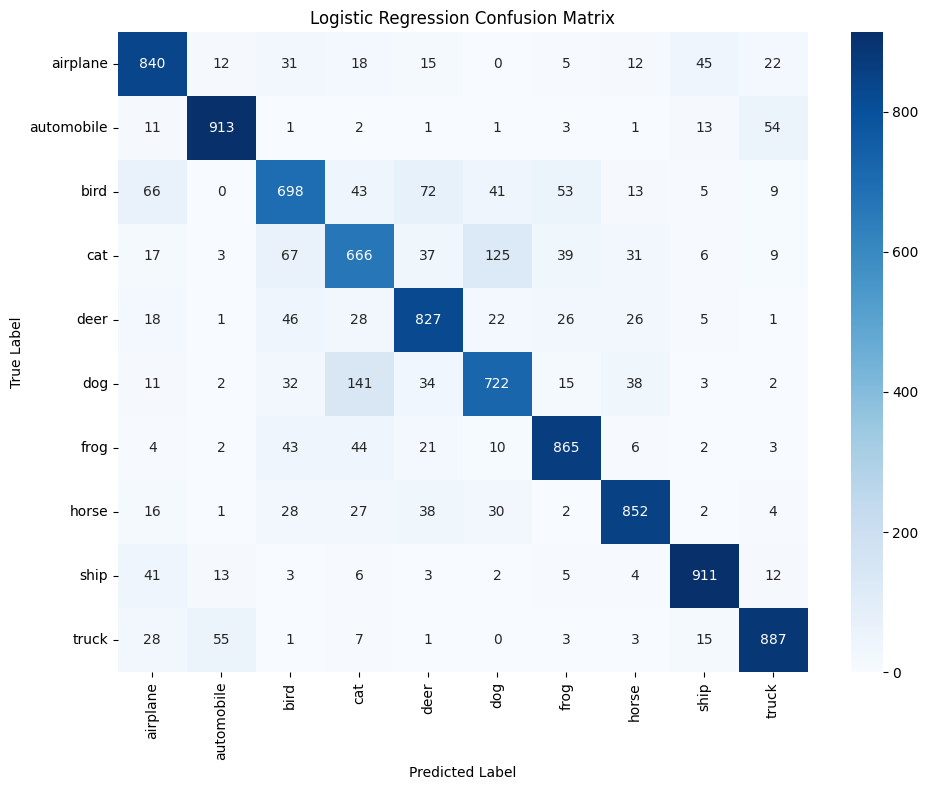


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    airplane       0.80      0.84      0.82      1000
  automobile       0.91      0.91      0.91      1000
        bird       0.73      0.70      0.72      1000
         cat       0.68      0.67      0.67      1000
        deer       0.79      0.83      0.81      1000
         dog       0.76      0.72      0.74      1000
        frog       0.85      0.86      0.86      1000
       horse       0.86      0.85      0.86      1000
        ship       0.90      0.91      0.91      1000
       truck       0.88      0.89      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [19]:
def train_logistic_regression(X_train_features, y_train, X_test_features, y_test, class_names):
    print("\n" + "="*50)
    print("PART 4B: LOGISTIC REGRESSION CLASSIFIER")
    print("="*50)

    print("Training Logistic Regression classifier...")

    # Scale features
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_features)
    X_test_scaled = scaler.transform(X_test_features)

    # Apply PCA for dimensionality reduction (for consistency with SVM)
    print("Applying PCA to reduce dimensions...")
    n_components = 100  # Same as SVM for fair comparison
    pca = PCA(n_components=n_components, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Reduced feature dimensions: {X_train_pca.shape}")
    print(f"Variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")

    # Train Logistic Regression
    print("Training Logistic Regression model...")
    start_time = time.time()

    lr_clf = LogisticRegression(
        C=1.0,
        max_iter=100,
        n_jobs=-1,  # Use all cores
        verbose=1,
        random_state=42
    )

    lr_clf.fit(X_train_pca, y_train)

    # Evaluate the model
    y_pred = lr_clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time

    print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")
    print(f"Logistic Regression Training Time: {training_time:.2f} seconds")

    # Save results
    with open('logistic_regression_results.pkl', 'wb') as f:
        pickle.dump({
            'y_pred': y_pred,
            'accuracy': accuracy,
            'training_time': training_time,
            'pca_components': n_components,
            'variance_explained': sum(pca.explained_variance_ratio_)*100
        }, f)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Logistic Regression Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nLogistic Regression Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    return lr_clf, y_pred, accuracy, training_time

# Execute the Logistic Regression classifier
lr_clf, lr_y_pred, lr_accuracy, lr_training_time = train_logistic_regression(
    X_train_features, y_train, X_test_features, y_test, class_names
)


PART 5: PERFORMANCE COMPARISON
Comparing model performances...

MODEL PERFORMANCE COMPARISON
                   Model  Accuracy  Training Time (s)
            CNN with MLP    0.8161         137.739241
      CNN Features + SVM    0.8163          13.408617
CNN Features + Log. Reg.    0.8181           5.543153


<ipython-input-20-36067094ee31>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


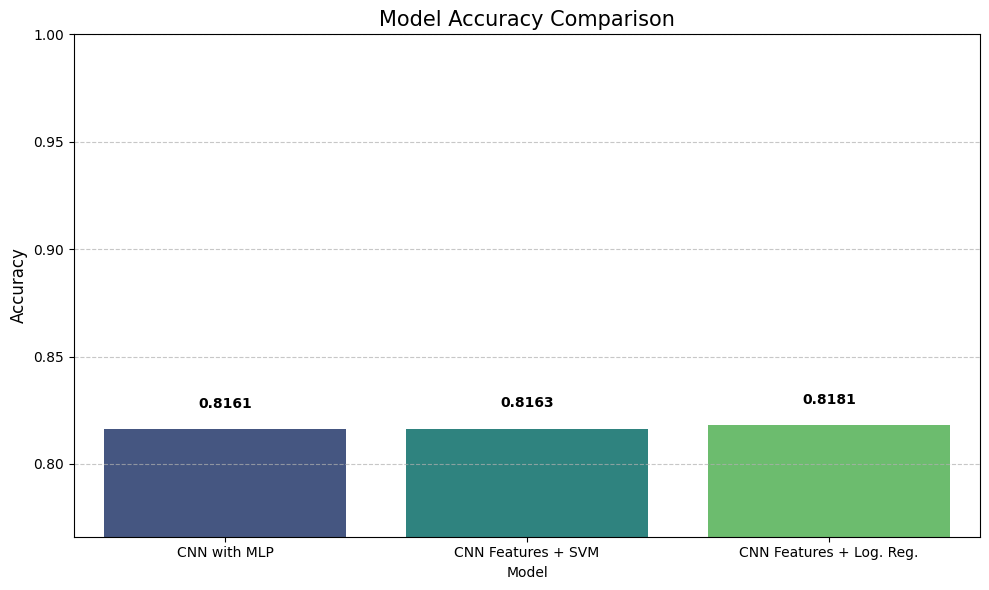

<ipython-input-20-36067094ee31>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Training Time (s)', data=df, palette='plasma')


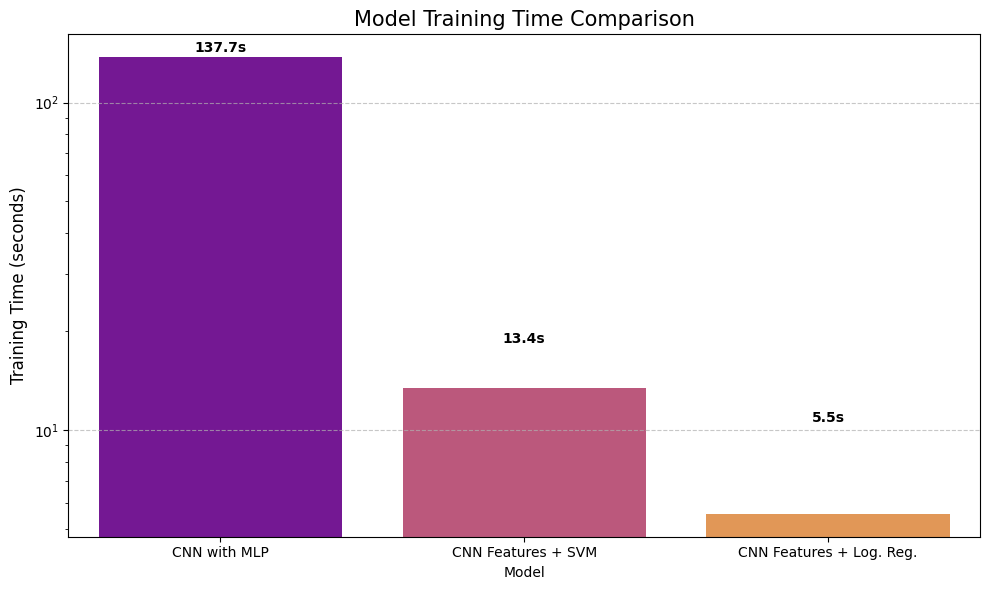

In [20]:
def compare_performances(cnn_acc, cnn_time, svm_acc, svm_time, lr_acc, lr_time):
    print("\n" + "="*50)
    print("PART 5: PERFORMANCE COMPARISON")
    print("="*50)

    print("Comparing model performances...")

    # Create comparison table
    models = ['CNN with MLP', 'CNN Features + SVM', 'CNN Features + Log. Reg.']
    accuracies = [cnn_acc, svm_acc, lr_acc]
    times = [cnn_time, svm_time, lr_time]

    comparison_data = {
        'Model': models,
        'Accuracy': accuracies,
        'Training Time (s)': times
    }

    df = pd.DataFrame(comparison_data)
    print("\n" + "="*50)
    print("MODEL PERFORMANCE COMPARISON")
    print("="*50)
    print(df.to_string(index=False))
    print("="*50)

    # Visualize accuracy comparison
    plt.figure(figsize=(10, 6))

    # Create bar chart
    ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

    # Add value labels on top of bars
    for i, v in enumerate(accuracies):
        ax.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

    plt.title('Model Accuracy Comparison', fontsize=15)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(min(accuracies) - 0.05, 1.0)  # Adjust y-axis to better see differences
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('model_accuracy_comparison.png')
    plt.show()

    # Visualize training time comparison
    plt.figure(figsize=(10, 6))

    # Create bar chart
    ax = sns.barplot(x='Model', y='Training Time (s)', data=df, palette='plasma')

    # Add value labels on top of bars
    for i, v in enumerate(times):
        ax.text(i, v + 5, f"{v:.1f}s", ha='center', fontweight='bold')

    plt.title('Model Training Time Comparison', fontsize=15)
    plt.ylabel('Training Time (seconds)', fontsize=12)
    plt.yscale('log')  # Using log scale since times might vary significantly
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('model_training_time_comparison.png')
    plt.show()

    # Save comparison results
    with open('model_comparison.pkl', 'wb') as f:
        pickle.dump(comparison_data, f)

    return comparison_data

# Execute the performance comparison
comparison = compare_performances(
    cnn_accuracy, cnn_training_time,
    svm_accuracy, svm_training_time,
    lr_accuracy, lr_training_time
)